In [1]:
# import libraries
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.datasets import make_blobs
from statistics import mean, stdev

In [2]:
# import the final merged dataset from previous notebook
# %run ./DataSetFinal.ipynb


# For easy analysis, we will import the final merged dataset FinalMerge.csv
dataSet= pd.read_csv('FinalMerge.csv', sep=',')
dataSet= dataSet.drop(columns=['Unnamed: 0'])
#dataSet.head()

In [34]:
# Seperating Male-Female dataset
male = dataSet[dataSet['Gender'] == ' Male']
female = dataSet[dataSet['Gender'] == ' Female']
#len(female)

In [4]:
# Defining function 
def mergeralpha(data):
    namelist = []
    for c in range(len(male)):
        try:
            namelist.append(data[c])
        except:
            pass
    namelist = str(namelist).replace("'", "")
    namelist = str(namelist).replace("[", "")
    namelist = str(namelist).replace("]", "")
    namelist = namelist.split(',')
    for m in range(len(namelist)):
        namelist[m] = namelist[m].strip()
    myCounter = Counter(namelist)
    #myCounter = myCounter.most_common()

    return namelist, myCounter

In [5]:
# Defining function 
def mergeryear(data):
    namelist = []
    for c in range(len(male)):
        try:
            namelist.append(data[c])
        except:
            pass

    namelist = str(namelist).replace("'", "")
    namelist = str(namelist).replace("[", "")
    namelist = str(namelist).replace("]", "")
    namelist = namelist.split(',')
    for m in range(len(namelist)):
        namelist[m] = namelist[m].strip()
        namelist[m]=int(namelist[m])
    myCounter = Counter(namelist)
    #myCounter = myCounter.most_common()

    return namelist, myCounter

In [6]:
#counter 
maleCountryList, maleCountryCounter = mergeralpha(male.Countries)
femaleCountryList, femaleCountryCounter = mergeralpha(female.Countries)
maleAlbumYear, maleAlbumYearCounter = mergeryear(male.Release_Years)
femaleAlbumYear, femaleAlbumYearCounter = mergeryear(female.Release_Years)
maleGigYear, maleGigYearCounter = mergeryear(male.ConcertYears)
femaleGigYear, femaleGigYearCounter = mergeryear(female.ConcertYears)

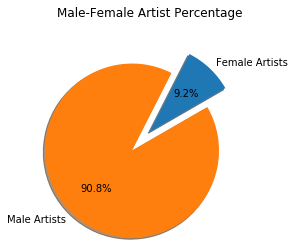

In [7]:
# Male-Female Artist Percentage
maleCount= len(male)
femaleCount= len(female)

malePercentage= (maleCount/(maleCount+femaleCount))*100
femalePercentage= (femaleCount/(maleCount+femaleCount))*100

# Plot
mfPercentage = [femalePercentage, malePercentage]
labelname = 'Female Artists','Male Artists'
explode = (0, 0.3)
fig= plt.pie(mfPercentage, labels=labelname, autopct='%1.1f%%', explode= explode, shadow=True, startangle=30, textprops=dict(color="black"))
plt.title('Male-Female Artist Percentage')
fig1 = plt.gcf()
plt.show()
fig1.savefig('mfArtistPercentage.png')

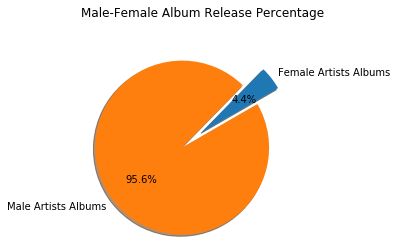

In [8]:
# Ratio of Album releases between Male and female
maleAlbums= sum(male['AlbumCount'])
femaleAlbums= sum(female['AlbumCount'])
maleAlbumPercentage= (maleAlbums/(maleAlbums+femaleAlbums))*100
femaleAlbumPercentage= (femaleAlbums/(maleAlbums+femaleAlbums))*100

# Plot
mfAlbumPercentage = [femaleAlbumPercentage, maleAlbumPercentage]
labelname = 'Female Artists Albums','Male Artists Albums'
explode = (0, 0.3)
fig= plt.pie(mfAlbumPercentage, labels=labelname, autopct='%1.1f%%', explode= explode, shadow=True, startangle=30, textprops=dict(color="black"))
plt.title('Male-Female Album Release Percentage')
fig2 = plt.gcf()
plt.show()
fig2.savefig('mfAlbumPercentage.png')

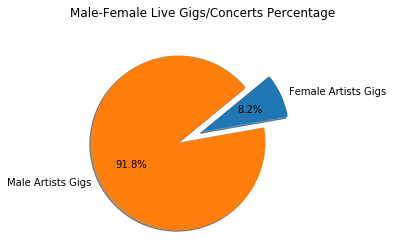

In [9]:
# Ratio of Gigs between male and female
maleGigs= sum(male['GigCount'])
femaleGigs= sum(female['GigCount'])
maleGigsPercentage= (maleGigs/(maleGigs+femaleGigs))*100
femaleGigsPercentage= (femaleGigs/(maleGigs+femaleGigs))*100

# Plot
mfGigsPercentage = [femaleGigsPercentage, maleGigsPercentage]
labelname = 'Female Artists Gigs','Male Artists Gigs'
explode = (0, 0.3)
fig= plt.pie(mfGigsPercentage, labels=labelname, autopct='%1.1f%%', explode= explode, shadow=True, startangle=10, textprops=dict(color="black"))
plt.title('Male-Female Live Gigs/Concerts Percentage')
fig3 = plt.gcf()
plt.show()
fig3.savefig('mfGigsPercentage.png')

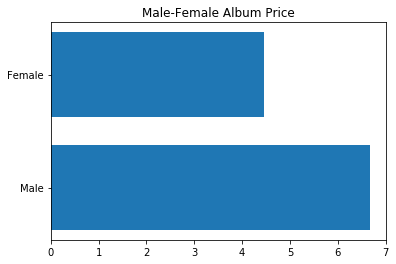

In [10]:
#ratio between the average release prices between male and female

maleAvgPrice= sum(male['AvgPrice'])
femaleAvgPrice= sum(female['AvgPrice'])
malereleaseAvgPrice= (maleAvgPrice/len(male))
femalereleaseAvgPrice= (femaleAvgPrice/len(female))

mfreleaseAvgPrice=[malereleaseAvgPrice,femalereleaseAvgPrice]
x = ['Male','Female']

width = 0.75 

plt.barh(x,mfreleaseAvgPrice,width)
plt.title('Male-Female Album Price')
fig4 = plt.gcf()

plt.show()
fig4.savefig('mfPriceRatio.png')

In [11]:
malereleaseAvgPrice

6.665697964068718

In [12]:
femalereleaseAvgPrice

4.466691175553207

In [13]:
def normalizer (data):
    normalized_data = []
    c = Counter(data)
    for i in c.values():
        norm_i = (i-min(c.values()))/(max(c.values()) - min(c.values()))
        #norm_i = (i - mean(c.values()))/stdev(c.values())
        normalized_data.append(norm_i)
    norm_df = pd.DataFrame({'Year': list(c.keys()),'Original Values': list(c.values()), 'Normalized Values': normalized_data})
    norm_df = norm_df.sort_values(by =['Year'])
    return norm_df

In [35]:
mgig_normalized = normalizer(maleGigYear)
fgig_normalized = normalizer(femaleGigYear)
#len(mgig_normalized)
#mgig_normalized


In [36]:
malbum_normalized = normalizer(maleAlbumYear)
falbum_normalized = normalizer(femaleAlbumYear)
#falbum_normalized

In [20]:
normalized_gigyear = pd.merge(mgig_normalized,fgig_normalized, on='Year',how='inner')
normalized_gigyear = normalized_gigyear.set_index('Year')
normalized_gigyear = normalized_gigyear.rename(columns={"Normalized Values_x": "Normalized Male Gigs", "Normalized Values_y": "Normalized Female Gigs", "Original Values_x": "Original Male Gigs", "Original Values_y": "Original Female Gigs"})
normalized_gigyear_ten = normalized_gigyear[-10:]
normalized_gigyear = normalized_gigyear.drop(columns=['Original Male Gigs', 'Original Female Gigs'])
normalized_gigyear_ten

,Original Male Gigs,Normalized Male Gigs,Original Female Gigs,Normalized Female Gigs
Year,,,,
2010,9577,0.841181,504,0.493137
2011,10843,0.952389,748,0.732353
2012,11385,1.000000,1021,1.000000
2013,11051,0.970661,854,0.836275
2014,10187,0.894765,615,0.601961
2015,8723,0.766163,724,0.708824
2016,7998,0.702477,713,0.698039
2017,7713,0.677442,438,0.428431
2018,6918,0.607607,526,0.514706


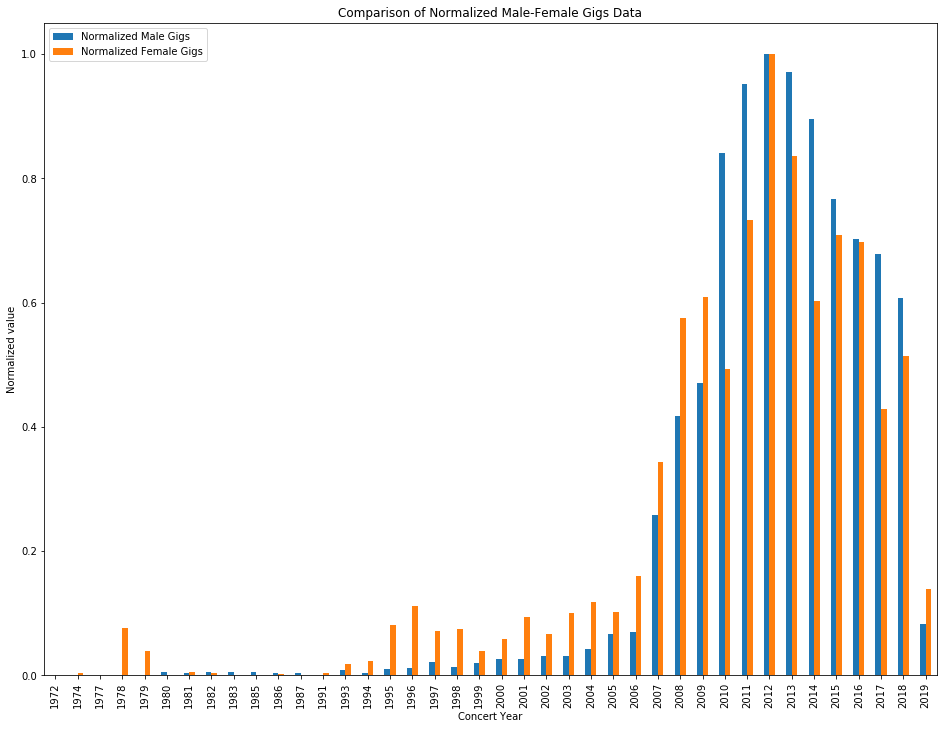

In [25]:
ax = normalized_gigyear.plot.bar(figsize= [16,12], rot=90)
plt.xlabel('Concert Year')
plt.ylabel('Normalized value')
plt.title('Comparison of Normalized Male-Female Gigs Data')
fig5 = plt.gcf()
plt.show()
fig5.savefig('mfNormGig.png')

In [22]:
normalized_albumyear = pd.merge(malbum_normalized,falbum_normalized, on='Year',how='inner')
normalized_albumyear = normalized_albumyear.set_index('Year')
normalized_albumyear = normalized_albumyear.rename(columns={"Normalized Values_x": "Normalized Male Albums", "Normalized Values_y": "Normalized Female Albums", "Original Values_x": "Original Male Albums", "Original Values_y": "Original Female Albums"})
normalized_albumyear_ten = normalized_albumyear[-10:]
normalized_albumyear = normalized_albumyear.drop(columns=['Original Male Albums', 'Original Female Albums'])
normalized_albumyear_ten

,Original Male Albums,Normalized Male Albums,Original Female Albums,Normalized Female Albums
Year,,,,
2010,795,0.728440,32,0.525424
2011,884,0.810092,39,0.644068
2012,932,0.854128,34,0.559322
2013,924,0.846789,48,0.796610
2014,874,0.800917,33,0.542373
2015,970,0.888991,60,1.000000
2016,919,0.842202,39,0.644068
2017,1013,0.928440,30,0.491525
2018,1091,1.000000,54,0.898305


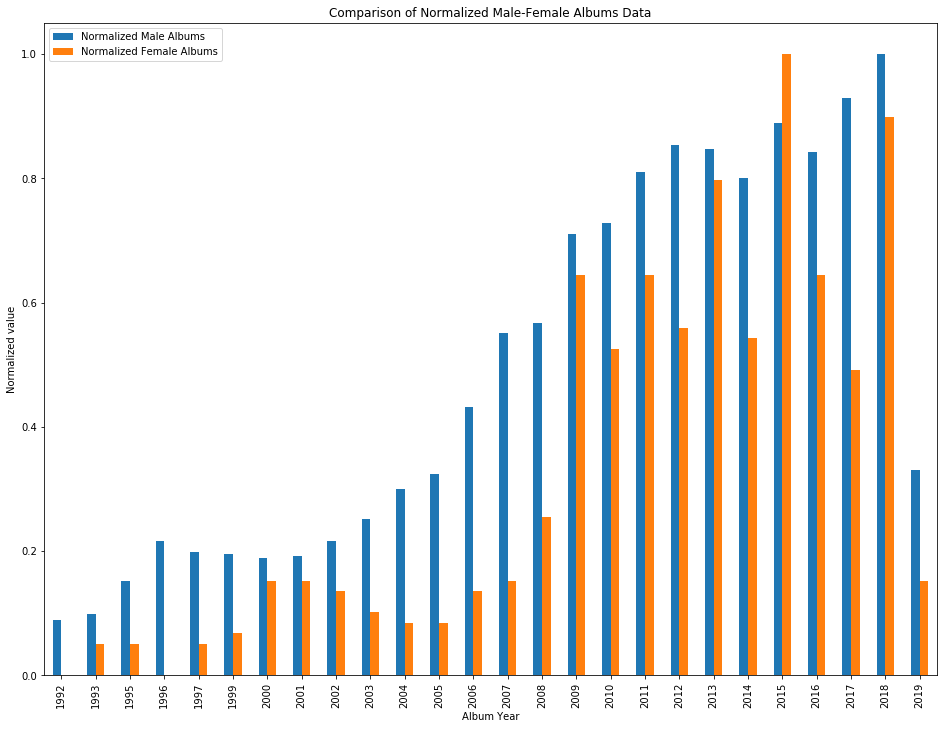

In [26]:
bx = normalized_albumyear.plot.bar(figsize= [16,12], rot=90)
plt.xlabel('Album Year')
plt.ylabel('Normalized value')
plt.title('Comparison of Normalized Male-Female Albums Data')
fig6 = plt.gcf()
plt.show()
fig6.savefig('mfNormAlbum.png')

In [27]:
#male country count  
#female country count

mcc=Counter(maleCountryList)
fcc= Counter(femaleCountryList)

labelname ='Female percentage','Male percentage'

USAgigs = [fcc['us'], mcc['us']]
UKgigs = [fcc['uk'], mcc['uk']]
Croatiagigs = [fcc['croatia'], mcc['croatia']]
DEgigs = [fcc['germany'], mcc['germany']]
FRgigs = [fcc['france'], mcc['france']]
AUSgigs = [fcc['australia'], mcc['australia']] 

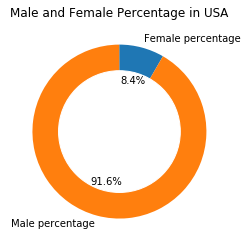

In [28]:
#plotting male-female ratio in top 5 countries (on the basis of artist number)

circle= plt.Circle( (0,0), 0.7, color= 'white' )
plt.pie(USAgigs,labels=labelname ,autopct='%1.1f%%', startangle= 60)
plt.title('Male and Female Percentage in USA')
fig7 = plt.gcf()
fig7.gca().add_artist(circle)
plt.show()
fig7.savefig('mfUSApercentage.png')

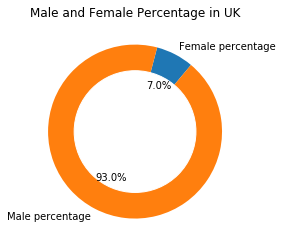

In [29]:
circle= plt.Circle( (0,0), 0.7, color= 'white' )
plt.pie(UKgigs,labels=labelname ,autopct='%1.1f%%', startangle= 50)
plt.title('Male and Female Percentage in UK')
fig8 = plt.gcf()
fig8.gca().add_artist(circle)
plt.show()
fig8.savefig('mfUKpercentage.png')

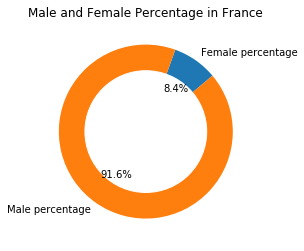

In [30]:
circle= plt.Circle( (0,0), 0.7, color= 'white' )
plt.pie(FRgigs,labels=labelname ,autopct='%1.1f%%', startangle= 40)
plt.title('Male and Female Percentage in France')
fig9 = plt.gcf()
fig9.gca().add_artist(circle)
plt.show()
fig9.savefig('mfFRpercentage.png')

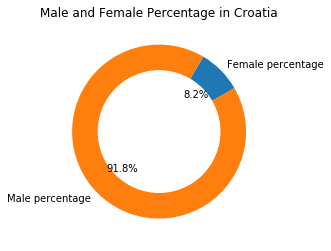

In [31]:
circle= plt.Circle( (0,0), 0.7, color= 'white' )
plt.pie(Croatiagigs,labels=labelname ,autopct='%1.1f%%', startangle= 30)
plt.title('Male and Female Percentage in Croatia')
fig10 = plt.gcf()
fig10.gca().add_artist(circle)
plt.show()
fig10.savefig('mfCroatiapercentage.png')

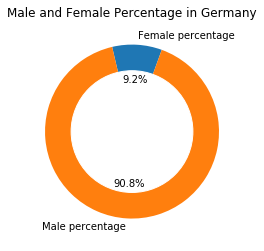

In [32]:
circle= plt.Circle( (0,0), 0.7, color= 'white' )
plt.pie(DEgigs,labels=labelname ,autopct='%1.1f%%', startangle= 70)
plt.title('Male and Female Percentage in Germany')
fig11 = plt.gcf()
fig11.gca().add_artist(circle)
plt.show()
fig11.savefig('mfDEpercentage.png')

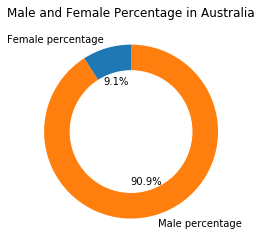

In [33]:
circle= plt.Circle( (0,0), 0.7, color= 'white' )
plt.pie(AUSgigs,labels=labelname ,autopct='%1.1f%%', startangle= 90)
plt.title('Male and Female Percentage in Australia')
fig12 = plt.gcf()
fig12.gca().add_artist(circle)
plt.axis
plt.show()
fig12.savefig('mfAUSpercentage.png')

In [ ]:
#End of Analysis